In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sales_data_sample.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.isnull().sum()/len(df)  *100

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [5]:
new_df=df.drop(['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY'],axis=1)

In [6]:
new_df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  CITY              2823 non-null   object 


In [8]:
new_df['CONTACTFULLNAME']=(new_df['CONTACTFIRSTNAME']+ ' ' +new_df['CONTACTLASTNAME'])

In [153]:
df1=new_df.drop(['CONTACTFIRSTNAME','CONTACTLASTNAME'],axis=1)
df1['ORDERDATE'] = pd.to_datetime(df1['ORDERDATE']).dt.normalize()



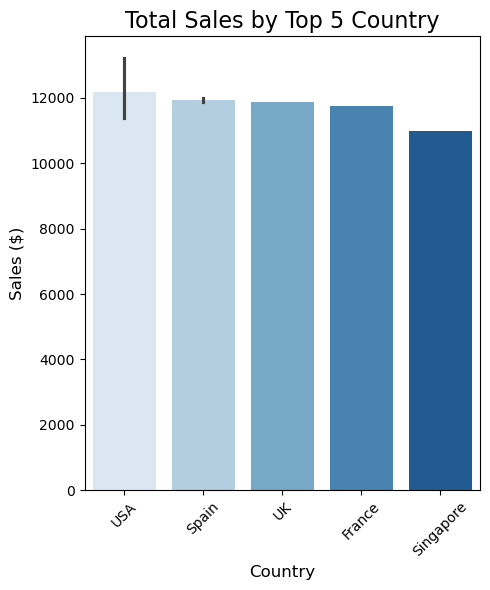

In [139]:


top_5_country = df1.sort_values(by='SALES', ascending=False).head(10)

plt.figure(figsize=(5, 6))

sns.barplot(data=top_5_country, x='COUNTRY', y='SALES', palette='Blues')

plt.title('Total Sales by Top 5 Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



                                                 Insight: Above graph shows that high sales by USA

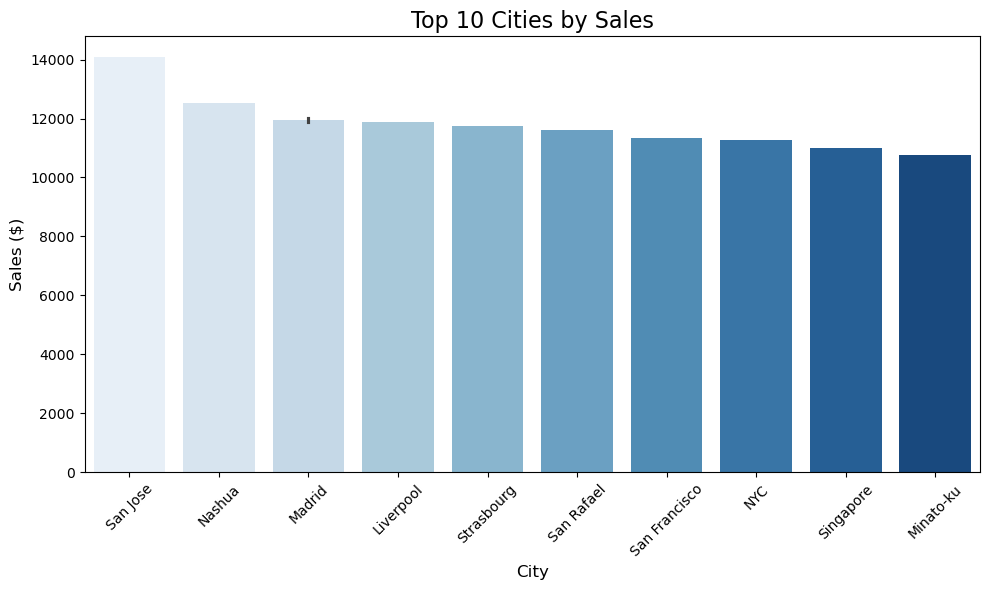

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_cities = df1.sort_values(by='SALES', ascending=False).head(11)


plt.figure(figsize=(10, 6))
sns.barplot(x='CITY', y='SALES', data=top_10_cities, palette='Blues')

plt.title('Top 10 Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


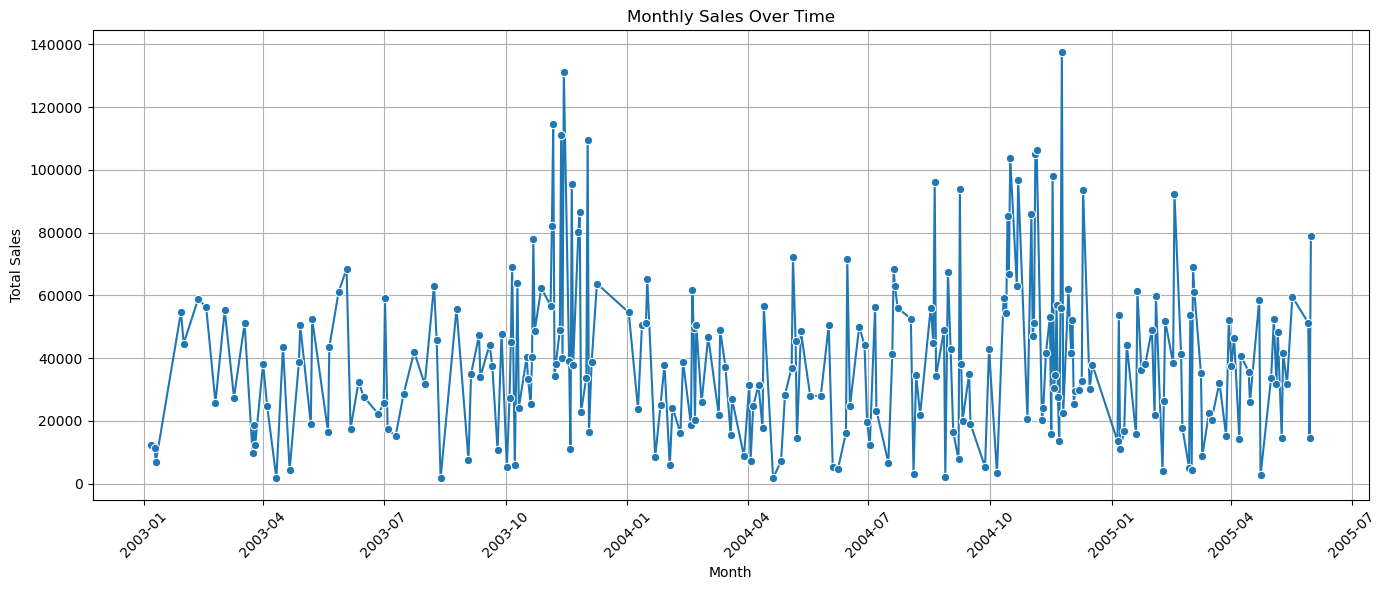

In [151]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


monthly_sales = df.groupby(df['ORDERDATE'])['SALES'].sum().reset_index()
monthly_sales['ORDERDATE'] = monthly_sales['ORDERDATE']


plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='ORDERDATE', y='SALES', marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


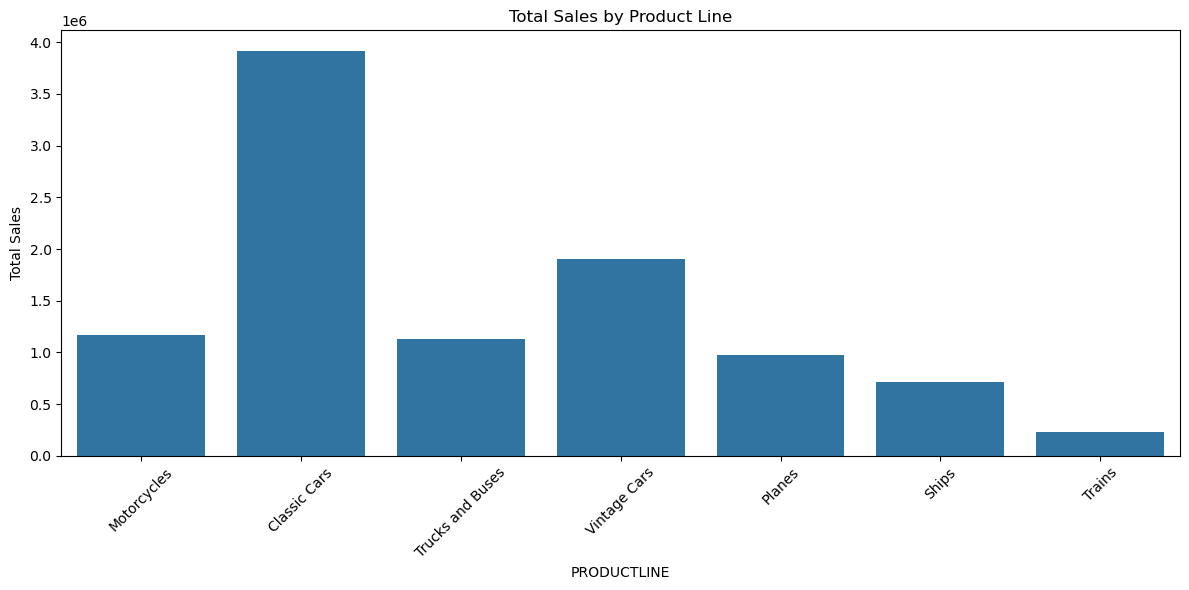

In [155]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='PRODUCTLINE', y='SALES', estimator=sum, ci=None)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

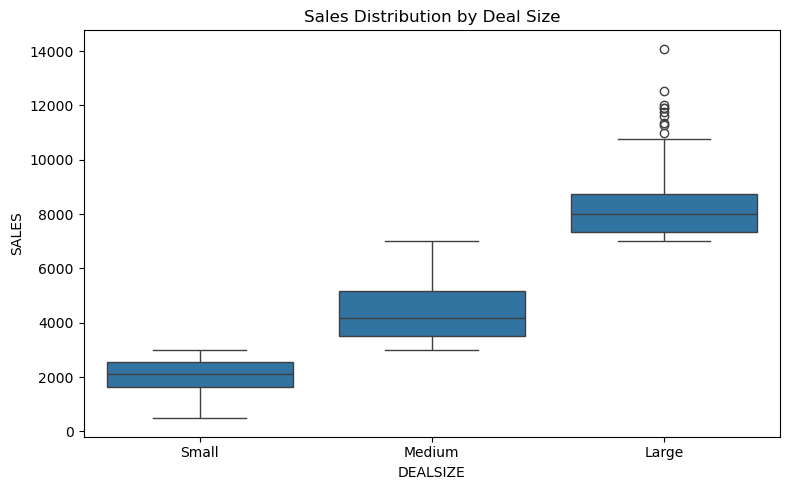

In [159]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x='DEALSIZE', y='SALES')
plt.title('Sales Distribution by Deal Size')
plt.tight_layout()
plt.show()

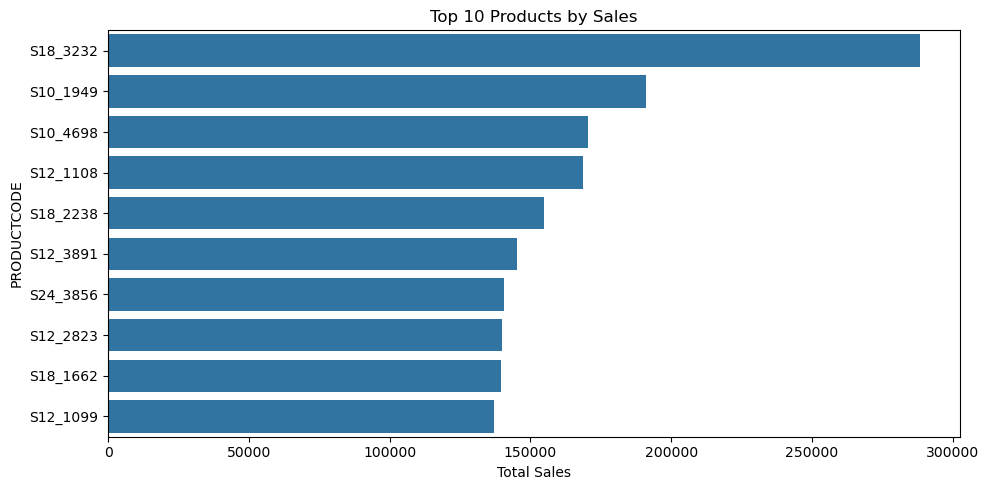

In [161]:
top_products = df1.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

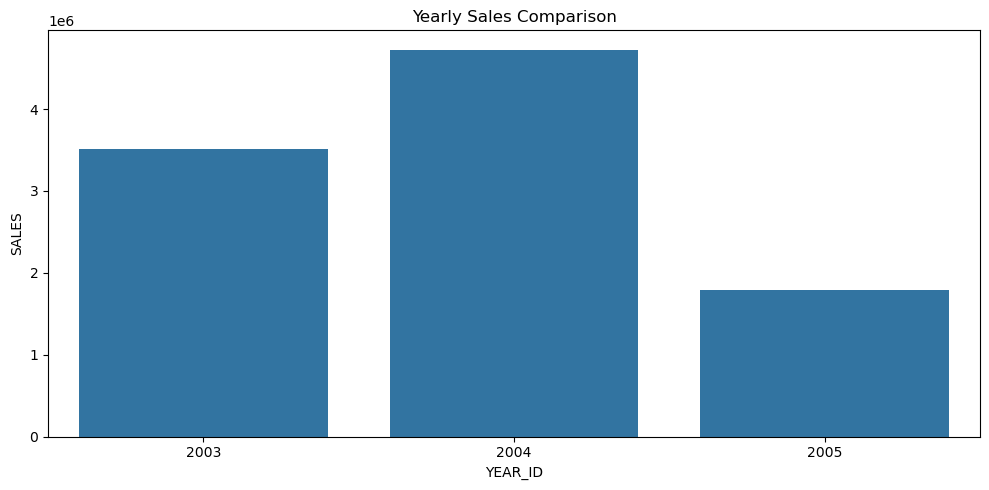

In [189]:
yearly_sales = df1.groupby('YEAR_ID')['SALES'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_sales, x='YEAR_ID', y='SALES')
plt.title("Yearly Sales Comparison")
plt.tight_layout()
plt.show()

